<h1 style="color: red">Gradient Descent Multiple Linear Regrassion</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
# Gradient Descent Function
def gradient_descent(X, y, w, b, alpha, iterations):
    x_mean = X.mean()
    X = X/x_mean
    n = len(y)
    costs = []  # To store costs for each iteration
    prev_cost = float('inf')
    tolerance = 1e-6
    
    i = 0
    while i<=iterations:
        # Calculate predictions using the current weights and bias
        y_predict = np.dot(X, w) + b
        
        # Calculate the cost (Mean Squared Error) for the current predictions
        cost = (1 / (2 * n)) * np.sum((y_predict - y) ** 2)
        
        # Check for convergence using math.isclose()
        if math.isclose(prev_cost, cost, rel_tol=tolerance, abs_tol=0.0):
            print(f"Converged at iteration {i+1}. Cost: {cost:.6f}")
            break
        
        # Calculate gradients for weights and bias
        dw = (1/n) * np.dot(X.T, (y_predict - y))
        db = (1/n) * np.sum(y_predict - y)
        
        # Update weights and bias using the gradients and learning rate
        w = w - alpha * dw
        b = b - alpha * db
        
        # Append the current cost to the costs list for visualization
        costs.append(cost)
        prev_cost = cost
        i+=1

    
    w = w/x_mean
    return w, b, costs, i

In [3]:
# Defining a training set
# x_train = np.array([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0], [10.0, 11.0, 12.0]])   #features
# y_train = np.array([10, 20, 30, 40])   #target value

df = pd.read_csv("house_prices_additional_features.csv")
x_train = df[['SquareFeet', 'Bedrooms', 'Bathrooms', 'Age']]
y_train = df["Price"]

w = np.array([0, 0, 0, 0])  # Initialize weights as a NumPy array
b = 0                      # Initialize bias
alpha = 0.3               # Learning rate
iterations = 10000        # Number of iterations

# Calling the gradient descent function to get the final weights, bias, and costs
final_w, final_b, costs, iterations = gradient_descent(x_train, y_train, w, b, alpha, iterations)

# Print the final weights and bias after training
print("Final weights:", final_w)
print("Final bias:", final_b)

Converged at iteration 5577. Cost: 8915049.532947
Final weights: SquareFeet      131.995804
Bedrooms     -31120.278076
Bathrooms     38070.057767
Age           -3325.536626
dtype: float64
Final bias: 61410.58677822988


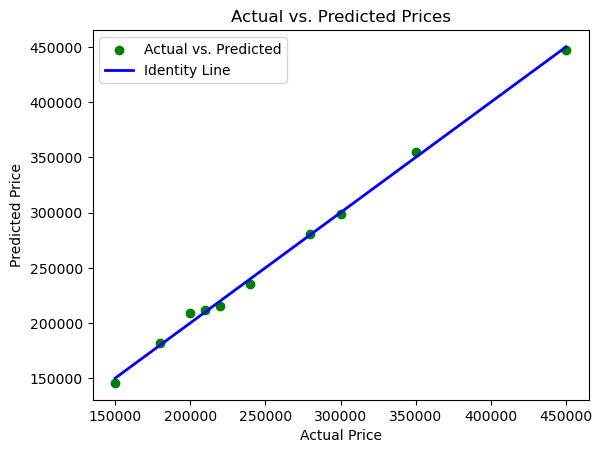

In [4]:
# Calculate the predicted y values using the trained model
y_predicted = np.dot(x_train, final_w) + final_b

# Scatter plot of the actual data points
plt.scatter(y_train, y_predicted, color='green', label='Actual vs. Predicted')

# Plot the identity line (y = x) for reference
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='blue', linewidth=2, label='Identity Line')

plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')
plt.legend()
plt.show()

In [5]:
def predict(x, w, b):
    return np.dot(x, w)+b

# Example usage
x_test = np.array([2000, 4, 3, 5])  # Replace with your actual test features
predicted_price = predict(x_test, final_w, final_b)  # Use the weights and bias from training
print("Predicted price:", predicted_price)

Predicted price: 298503.573032652


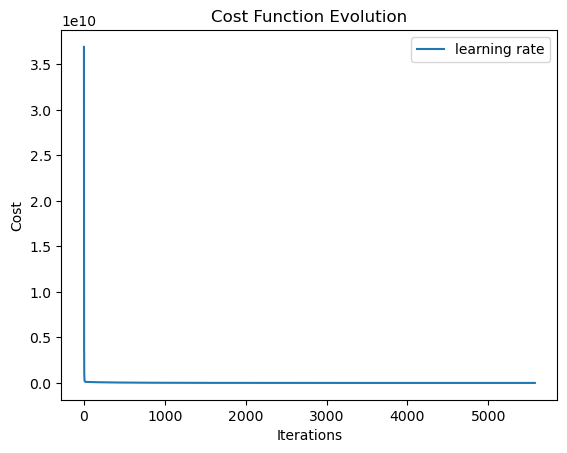

In [6]:
# Now let's see how our we get the coverage cost:
# Plotting the cost over iterations

plt.plot(range(iterations), costs, label="learning rate")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Evolution")
plt.legend()
plt.show()

In [7]:
# Now finding our R Squared to see the goodness of our eqn
SSR = np.sum((y_predicted - y_train)**2)
SST = np.sum((y_train - y_train.mean())**2)
Rsqr = 1 - (SSR / SST)
Rsqr # Range: [1-0]

0.9975494641195857

(4,)